## Notebook for experimenting with Dynamic Programming algorithm

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean
import os

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
def parseParamsFromName(fileName):
    split = fileName.split("_")
    if len(split) is not 3 and len(split) is not 4:
        raise ValueError('Unexpected fileName: ' + fileName)
        
    if len(split) is 3:
        return split[0], split[1], split[2], 1
    else:
        return split[0], split[1], split[2], split[3]

In [3]:
def prepareDFCols(dirName, fileName):
    file_df = pd.read_csv(dirName + fileName)
    
    weightDist, priceWCorel, knapsackKapRatio, k = parseParamsFromName(fileName[:-4])
    
    file_df = file_df.assign(w_dist=weightDist)
    file_df = file_df.assign(c_w_corr=priceWCorel)
    file_df = file_df.assign(c_w_ratio=knapsackKapRatio)
    file_df = file_df.assign(k=k)
    
    return file_df

In [4]:
# load data from folder, create important columns and concat all files into 1 df
def loadDF(dirName):
    df = None
    
    for fileName in os.listdir(dirName):
        if df is None:
            df = prepareDFCols(dirName, fileName)
        else:
            df = pd.concat([df, prepareDFCols(dirName, fileName)], ignore_index=True)

    # make all ids positive
    df['KnapsackId'] = abs(df['KnapsackId'])
    return df

In [5]:
# definice pouzitelnych promennych
ROOT_FOLDER_NAME = './Output/'
params_w = ['bal', 'light', 'heavy']
params_c = ['uni', 'corr', 'strong']
params_m = {
    0.01: '001',
    0.25: '025',
    0.5: '05',
    0.8: '08',
    1: '1'
}

dp = 'DP_PD'
# greedy = 'Greedy'
# greedyRedux = 'GreedyRedux'

In [6]:
# ziskani pozadovanych dat
df = loadDF(ROOT_FOLDER_NAME + dp + '/')

display(df.head())

,KnapsackId,NumberOfItems,CpuTime,NodesVisited,Error,w_dist,c_w_corr,c_w_ratio,k
0,1,20,0.0,0,0.0,bal,corr,001,1
1,2,20,0.0,0,0.0,bal,corr,001,1
2,3,20,0.0,0,0.0,bal,corr,001,1
3,4,20,0.0,0,0.0,bal,corr,001,1
4,5,20,0.0,0,0.0,bal,corr,001,1


In [7]:
# load results.csv
res = pd.read_csv('results.csv')
res = res[res['AlgoName'] == dp]
for index, row in res.iterrows():
    weightDist, priceWCorel, knapsackKapRatio, k = parseParamsFromName(row['FileName'])
    res.loc[index, 'w_dist'] = weightDist
    res.loc[index, 'c_w_corr'] = priceWCorel
    res.loc[index, 'c_w_ratio'] = knapsackKapRatio
    res.loc[index, 'k'] = k
    
display(res.head())

,FileName,AlgoName,CpuTime,Date,w_dist,c_w_corr,c_w_ratio,k
136,bal_uni_001,DP_PD,0.296875,2020-11-15,bal,uni,001,1
137,light_strong_08,DP_PD,0.093750,2020-11-15,light,strong,08,1
138,bal_uni_025_098,DP_PD,0.078125,2020-11-15,bal,uni,025,098
139,light_strong_05,DP_PD,0.046875,2020-11-15,light,strong,05,1
140,bal_uni_025_099,DP_PD,0.109375,2020-11-15,bal,uni,025,099


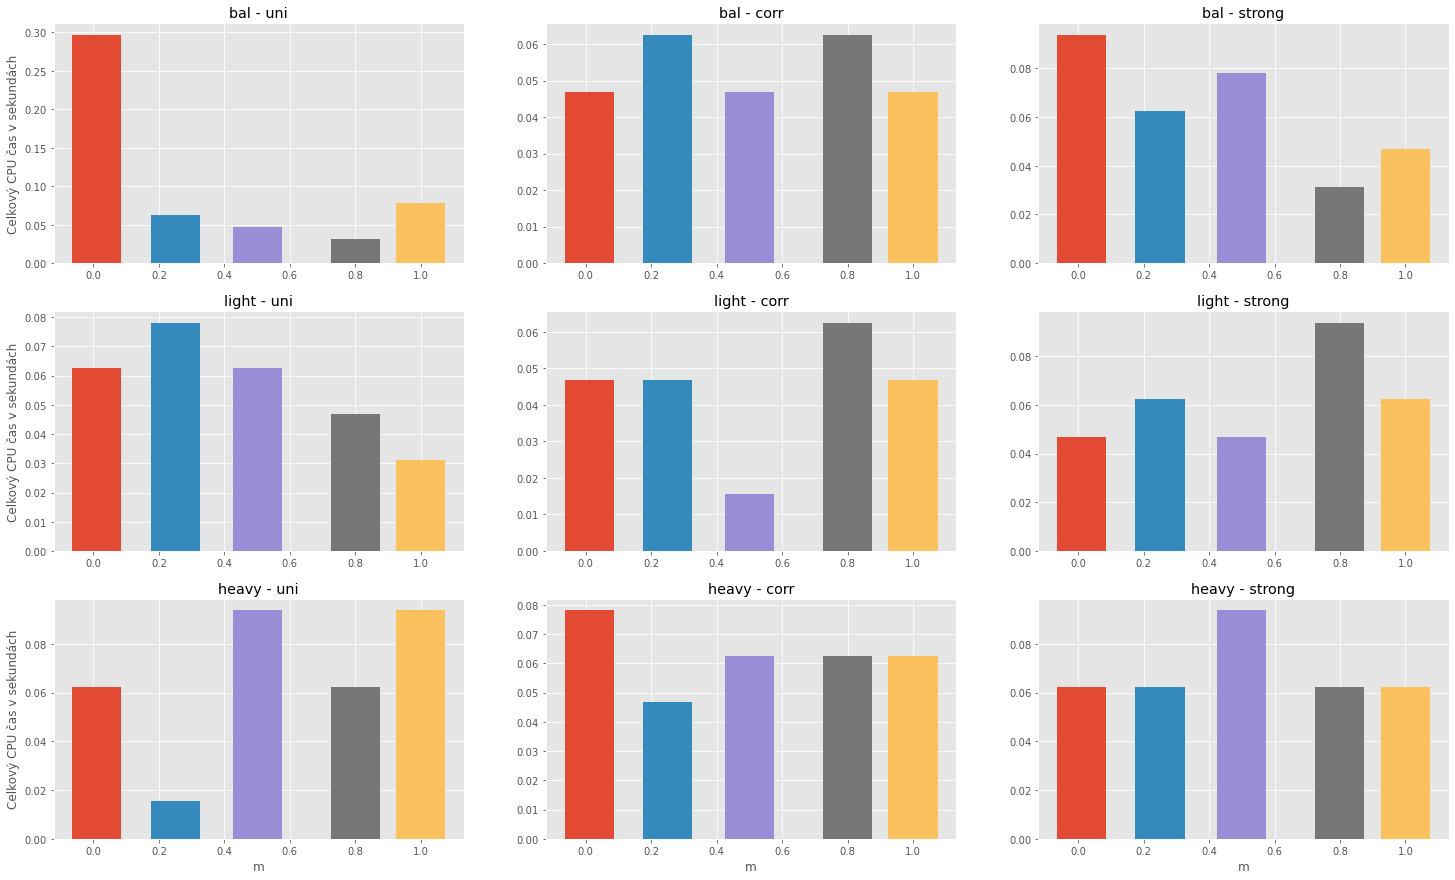

In [8]:
# plot pilot data
columnName = 'CpuTime'
i = 331
plt.figure(figsize=(25,15))

for w in params_w:
    for c in params_c:
        plt.subplot(i)
        for m in params_m.keys():
            plt.bar(m,
                    res[(res['w_dist'] == w) & (res['c_w_corr'] == c)
                        & (res['c_w_ratio'] == params_m[m]) & (res['k'] == 1)][columnName].sum(),
                    width = 0.15
                   )
        plt.title(w + ' - ' + c)
        if w is params_w[-1]:
            plt.xlabel('m')
        if c is params_c[0]:
            plt.ylabel('Celkový CPU čas v sekundách')
        i += 1

In [9]:
np.linspace(0, 2, 5)

array([0. , 0.5, 1. , 1.5, 2. ])

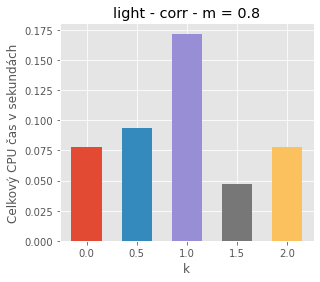

In [10]:
# different k values
columnName = 'CpuTime'
params_k = {
    0: '0',
    0.5: '05',
    1: '1',
    1.5: '15',
    2: '2'
}
i = 121
plt.figure(figsize=(10,4))

# max weight = 750
plt.subplot(i)
for k in params_k.keys():
    plt.bar(k,
            res[(res['w_dist'] == 'bal') & (res['c_w_corr'] == 'uni')
                & (res['c_w_ratio'] == '084') & (res['k'] == params_k[k])
               ][columnName].sum(),
            width = 0.3
           )
plt.title('light - corr - m = 0.8')
plt.xlabel('k')
plt.ylabel('Celkový CPU čas v sekundách')
i += 1

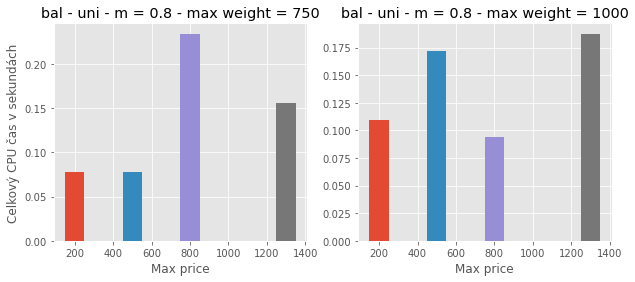

In [11]:
# bigger max weight + prices pilot experiment
columnName = 'CpuTime'
params_C = {
    200: '2',
    500: '3',
    800: '4',
    1300: '5'
}
i = 121
plt.figure(figsize=(10,4))

# max weight = 750
plt.subplot(i)
for C in params_C.keys():
    plt.bar(C,
            res[(res['w_dist'] == 'bal') & (res['c_w_corr'] == 'uni')
                & (res['c_w_ratio'] == '081') & (res['k'] == params_C[C])
               ][columnName].sum(),
            width = 100
           )
plt.title('bal - uni - m = 0.8 - max weight = 750')
plt.xlabel('Max price')
plt.ylabel('Celkový CPU čas v sekundách')
i += 1

# max weight = 1000
plt.subplot(i)
for C in params_C.keys():
    plt.bar(C,
            res[(res['w_dist'] == 'bal') & (res['c_w_corr'] == 'uni')
               & (res['c_w_ratio'] == '082') & (res['k'] == params_C[C])
              ][columnName].sum(),
            width = 100
           )
plt.title('bal - uni - m = 0.8 - max weight = 1000')
plt.xlabel('Max price')
plt.show()

In [12]:
def divide(startingNum, endNum, partsCnt):
    resultNumbers = [str(startingNum)]
    chunk_size = endNum//partsCnt
    chunk_start = startingNum
#     print(chunk_start)
    chunk_end = chunk_start + chunk_size -1
    while chunk_start < endNum:
        if chunk_end > endNum:
#             print(endNum)
            resultNumbers.append(str(endNum))
            break
#         print(chunk_end)
        resultNumbers.append(str(chunk_end))
        chunk_start += chunk_size
        chunk_end += chunk_size
    return resultNumbers

print('Rozdeleni intervalu na 9 stejne dlouhych casti')
params_C = divide(100, 250000, 9)
params_C

Rozdeleni intervalu na 9 stejne dlouhych casti


['100',
 '27876',
 '55653',
 '83430',
 '111207',
 '138984',
 '166761',
 '194538',
 '222315',
 '250000']

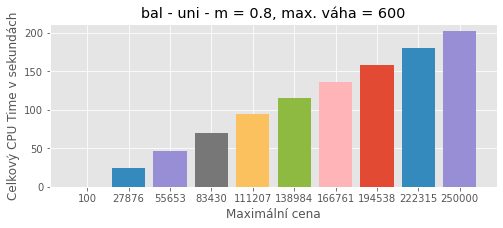

In [13]:
# big experiment data plotting - CPU
plt.figure(figsize=(8,3))

for C in params_C:
    plt.bar(C,
            df[(df['w_dist'] == 'bal') & (df['c_w_corr'] == 'uni')
               & (df['c_w_ratio'] == '083') & (df['k'] == C)
              ]['CpuTime'].sum()
           )
plt.title('bal - uni - m = 0.8, max. váha = 600')
plt.xlabel('Maximální cena')
plt.ylabel('Celkový CPU Time v sekundách')

plt.show()

In [14]:
# robustness
print('Výsledek pro původní instanci')
print(res[
    (res['w_dist'] == 'perm') & (res['c_w_corr'] == 'a')
    & (res['c_w_ratio'] == '01') & (res['k'] == 1)
].CpuTime.sum())
print('Výsledek pro instanci po permutaci')
print(res[
    (res['w_dist'] == 'perm') & (res['c_w_corr'] == 'b')
    & (res['c_w_ratio'] == '01') & (res['k'] == 1)
].CpuTime.sum())

Výsledek pro původní instanci
0.984375
Výsledek pro instanci po permutaci
0.963125
